# week 3
# For each of the Datasets A and B, do the following:

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import fashion_mnist, cifar10

# Fashion MNIST dataset

# Q1. Understanding the Dataset and Pre-processing: Implement the following:

In [11]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

Number of classes: 10


In [12]:
print(f"Image shape: {x_train.shape[1:]}")

Image shape: (28, 28)


In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

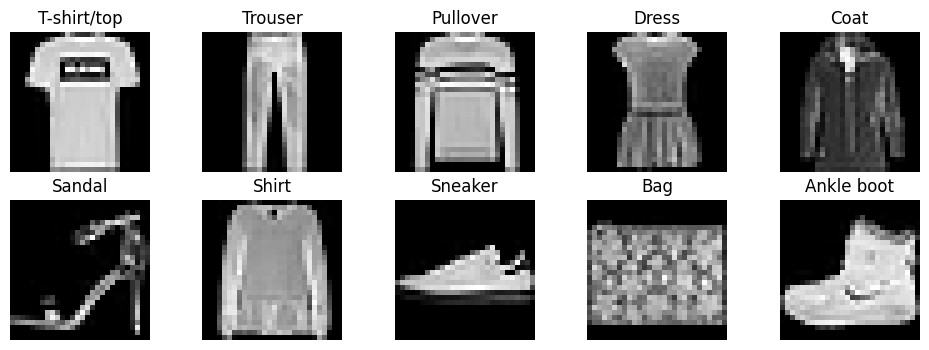

In [14]:
plt.figure(figsize=(12,4))
for cls in range(num_classes):
    idx = np.where(y_train == cls)[0][0]
    plt.subplot(2, 5, cls+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(class_names[cls])
    plt.axis('off')
plt.show()

In [18]:
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

# Q2. Performing experiments on Fully Connected Neural Networks (FCNN):

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
def build_fcnn(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [21]:
input_shape = (28, 28)
fcnn_model = build_fcnn(input_shape, num_classes)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_fcnn = fcnn_model.fit(x_train_norm, y_train,
                              validation_split=0.2,
                              epochs=30,
                              batch_size=64,
                              callbacks=[early_stop],
                              verbose=2)

2025-08-14 08:57:03.179002: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-14 08:57:03.407452: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-14 08:57:03.411655: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/30


2025-08-14 08:57:04.170481: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-08-14 08:57:04.263890: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x702d036a1c20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-14 08:57:04.263907: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-08-14 08:57:04.290605: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-08-14 08:57:04.325452: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2025-08-14 08:57:04.454542: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

750/750 - 2s - loss: 0.6208 - accuracy: 0.7770 - val_loss: 0.4419 - val_accuracy: 0.8378 - 2s/epoch - 2ms/step
Epoch 2/30
750/750 - 1s - loss: 0.4479 - accuracy: 0.8370 - val_loss: 0.3816 - val_accuracy: 0.8633 - 717ms/epoch - 956us/step
Epoch 3/30
750/750 - 1s - loss: 0.4020 - accuracy: 0.8540 - val_loss: 0.3608 - val_accuracy: 0.8680 - 731ms/epoch - 975us/step
Epoch 4/30
750/750 - 1s - loss: 0.3841 - accuracy: 0.8610 - val_loss: 0.3482 - val_accuracy: 0.8708 - 714ms/epoch - 953us/step
Epoch 5/30
750/750 - 1s - loss: 0.3680 - accuracy: 0.8658 - val_loss: 0.3400 - val_accuracy: 0.8790 - 800ms/epoch - 1ms/step
Epoch 6/30
750/750 - 1s - loss: 0.3541 - accuracy: 0.8698 - val_loss: 0.3319 - val_accuracy: 0.8824 - 742ms/epoch - 989us/step
Epoch 7/30
750/750 - 1s - loss: 0.3380 - accuracy: 0.8745 - val_loss: 0.3266 - val_accuracy: 0.8819 - 736ms/epoch - 981us/step
Epoch 8/30
750/750 - 1s - loss: 0.3290 - accuracy: 0.8781 - val_loss: 0.3519 - val_accuracy: 0.8681 - 709ms/epoch - 946us/step
Ep

In [22]:
test_loss, test_acc = fcnn_model.evaluate(x_test_norm, y_test, verbose=0)
print(f"FCNN Test Accuracy: {test_acc:.4f}")


FCNN Test Accuracy: 0.8857


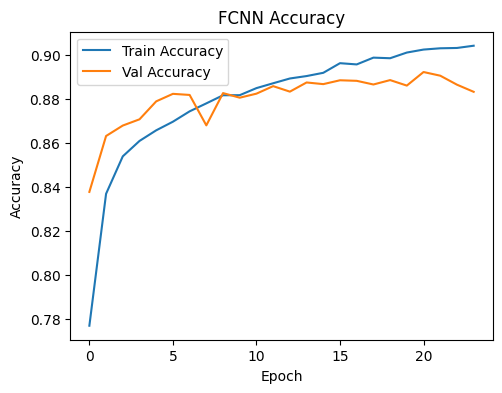

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_fcnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_fcnn.history['val_accuracy'], label='Val Accuracy')
plt.title('FCNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

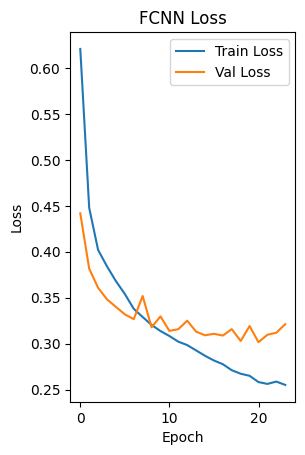

In [24]:
plt.subplot(1,2,2)
plt.plot(history_fcnn.history['loss'], label='Train Loss')
plt.plot(history_fcnn.history['val_loss'], label='Val Loss')
plt.title('FCNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Q3. Performing experiments on a Convolutional Neural Networks (CNNs):

In [25]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

In [34]:
x_train_cnn = x_train_norm[..., np.newaxis]
x_test_cnn = x_test_norm[..., np.newaxis]

In [35]:
def build_cnn_1(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, kernel_size=(5,5), strides=1, padding='valid', activation='relu'),
        MaxPooling2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_cnn_2(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, kernel_size=(3,3), strides=1, padding='valid', activation='relu'),
        Conv2D(32, kernel_size=(3,3), strides=1, padding='valid', activation='relu'),
        MaxPooling2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [36]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [39]:
cnn1_model = build_cnn_1((28,28,1), num_classes)
history_cnn1 = cnn1_model.fit(x_train_cnn, y_train,
                              validation_split=0.2,
                              epochs=30,
                              batch_size=64,
                              callbacks=[early_stop],
                              verbose=2)
test_loss1, test_acc1 = cnn1_model.evaluate(x_test_cnn, y_test, verbose=0)
print()
print(f"CNN-1 Test Accuracy: {test_acc1:.4f}")

Epoch 1/30
750/750 - 1s - loss: 0.4585 - accuracy: 0.8390 - val_loss: 0.3455 - val_accuracy: 0.8775 - 1s/epoch - 2ms/step
Epoch 2/30
750/750 - 1s - loss: 0.3146 - accuracy: 0.8888 - val_loss: 0.3239 - val_accuracy: 0.8821 - 846ms/epoch - 1ms/step
Epoch 3/30
750/750 - 1s - loss: 0.2726 - accuracy: 0.9023 - val_loss: 0.2775 - val_accuracy: 0.9018 - 812ms/epoch - 1ms/step
Epoch 4/30
750/750 - 1s - loss: 0.2418 - accuracy: 0.9123 - val_loss: 0.2541 - val_accuracy: 0.9071 - 840ms/epoch - 1ms/step
Epoch 5/30
750/750 - 1s - loss: 0.2149 - accuracy: 0.9215 - val_loss: 0.2774 - val_accuracy: 0.9022 - 822ms/epoch - 1ms/step
Epoch 6/30
750/750 - 1s - loss: 0.1943 - accuracy: 0.9302 - val_loss: 0.2523 - val_accuracy: 0.9069 - 866ms/epoch - 1ms/step
Epoch 7/30
750/750 - 1s - loss: 0.1762 - accuracy: 0.9355 - val_loss: 0.2547 - val_accuracy: 0.9100 - 789ms/epoch - 1ms/step
Epoch 8/30
750/750 - 1s - loss: 0.1582 - accuracy: 0.9428 - val_loss: 0.2450 - val_accuracy: 0.9119 - 812ms/epoch - 1ms/step
Epo

In [40]:
cnn2_model = build_cnn_2((28,28,1), num_classes)
history_cnn2 = cnn2_model.fit(x_train_cnn, y_train,
                              validation_split=0.2,
                              epochs=30,
                              batch_size=64,
                              callbacks=[early_stop],
                              verbose=2)
test_loss2, test_acc2 = cnn2_model.evaluate(x_test_cnn, y_test, verbose=0)
print()
print(f"CNN-2 Test Accuracy: {test_acc2:.4f}")

Epoch 1/30
750/750 - 2s - loss: 0.4332 - accuracy: 0.8467 - val_loss: 0.3268 - val_accuracy: 0.8797 - 2s/epoch - 3ms/step
Epoch 2/30
750/750 - 1s - loss: 0.2789 - accuracy: 0.8988 - val_loss: 0.2675 - val_accuracy: 0.9035 - 1s/epoch - 2ms/step
Epoch 3/30
750/750 - 1s - loss: 0.2277 - accuracy: 0.9179 - val_loss: 0.2439 - val_accuracy: 0.9122 - 1s/epoch - 2ms/step
Epoch 4/30
750/750 - 1s - loss: 0.1933 - accuracy: 0.9287 - val_loss: 0.2286 - val_accuracy: 0.9168 - 1s/epoch - 2ms/step
Epoch 5/30
750/750 - 1s - loss: 0.1621 - accuracy: 0.9399 - val_loss: 0.2518 - val_accuracy: 0.9106 - 1s/epoch - 2ms/step
Epoch 6/30
750/750 - 1s - loss: 0.1353 - accuracy: 0.9492 - val_loss: 0.2343 - val_accuracy: 0.9202 - 1s/epoch - 2ms/step
Epoch 7/30
750/750 - 1s - loss: 0.1092 - accuracy: 0.9608 - val_loss: 0.2388 - val_accuracy: 0.9203 - 1s/epoch - 2ms/step

CNN-2 Test Accuracy: 0.9130


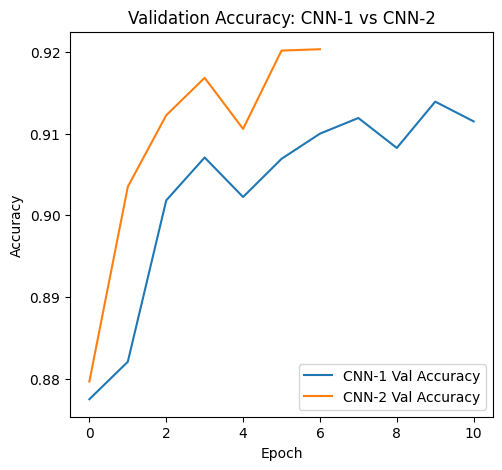

In [41]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_cnn1.history['val_accuracy'], label='CNN-1 Val Accuracy')
plt.plot(history_cnn2.history['val_accuracy'], label='CNN-2 Val Accuracy')
plt.title('Validation Accuracy: CNN-1 vs CNN-2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

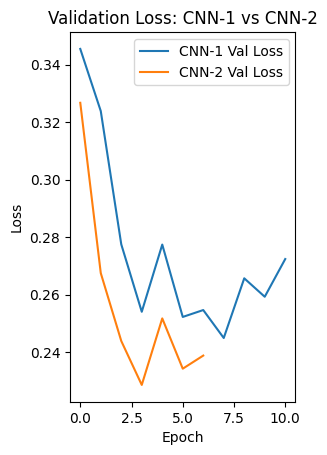

In [42]:
plt.subplot(1,2,2)
plt.plot(history_cnn1.history['val_loss'], label='CNN-1 Val Loss')
plt.plot(history_cnn2.history['val_loss'], label='CNN-2 Val Loss')
plt.title('Validation Loss: CNN-1 vs CNN-2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Q4. Compare the performances of FCNN and CNN. 

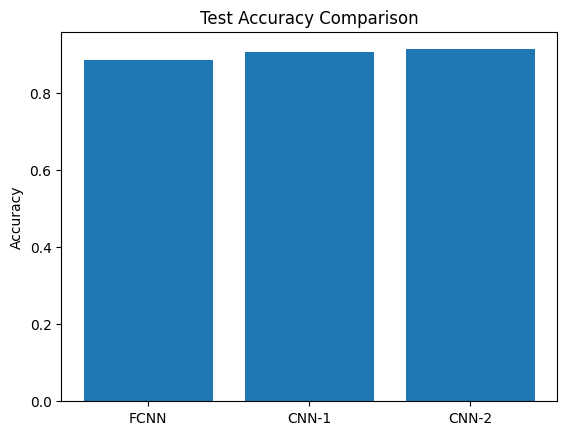

In [43]:
models = ['FCNN', 'CNN-1', 'CNN-2']
accuracies = [test_acc, test_acc1, test_acc2]

plt.bar(models, accuracies)
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


# Q5. Compare the number of parameters in the FCNN and the CNN. Which layer/s in CNN contribute most to the total number of parameters.

In [44]:
print("FCNN Model Summary:")
fcnn_model.summary()

print("\nCNN-1 Model Summary:")
cnn1_model.summary()

print("\nCNN-2 Model Summary:")
cnn2_model.summary()


FCNN Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Tra

# CIFAR-10 dataset 

In [82]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import fashion_mnist, cifar10

# Q1. Understanding the Dataset and Pre-processing: Implement the following:

In [83]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

Number of classes: 10


In [84]:
print(f"Image shape: {x_train.shape[1:]}")

Image shape: (32, 32, 3)


In [85]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"
]


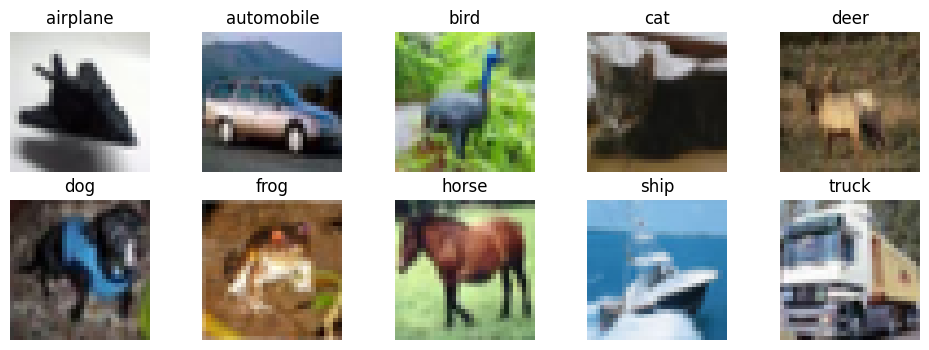

In [86]:
plt.figure(figsize=(12,4))
for cls in range(num_classes):
    idx = np.where(y_train == cls)[0][0]
    plt.subplot(2, 5, cls+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(class_names[cls])
    plt.axis('off')
plt.show()

In [87]:
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

# Q2. Performing experiments on Fully Connected Neural Networks (FCNN):

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [90]:
x_train_fcnn = x_train_norm.reshape(x_train_norm.shape[0], -1)
x_test_fcnn = x_test_norm.reshape(x_test_norm.shape[0], -1)

In [91]:
def build_fcnn_cifar(input_shape, num_classes):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_shape,)),
        Dropout(0.4),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [92]:
fcnn_cifar_model = build_fcnn_cifar(x_train_fcnn.shape[1], num_classes)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_fcnn_cifar = fcnn_cifar_model.fit(
    x_train_fcnn, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/30
625/625 - 1s - loss: 2.1057 - accuracy: 0.2129 - val_loss: 2.0075 - val_accuracy: 0.2478 - 1s/epoch - 2ms/step
Epoch 2/30
625/625 - 1s - loss: 1.9876 - accuracy: 0.2548 - val_loss: 1.9018 - val_accuracy: 0.3282 - 746ms/epoch - 1ms/step
Epoch 3/30
625/625 - 1s - loss: 1.9484 - accuracy: 0.2679 - val_loss: 1.9179 - val_accuracy: 0.3095 - 805ms/epoch - 1ms/step
Epoch 4/30
625/625 - 1s - loss: 1.9265 - accuracy: 0.2778 - val_loss: 1.8736 - val_accuracy: 0.3377 - 763ms/epoch - 1ms/step
Epoch 5/30
625/625 - 1s - loss: 1.9124 - accuracy: 0.2825 - val_loss: 1.8657 - val_accuracy: 0.3234 - 763ms/epoch - 1ms/step
Epoch 6/30
625/625 - 1s - loss: 1.8985 - accuracy: 0.2902 - val_loss: 1.8702 - val_accuracy: 0.3368 - 748ms/epoch - 1ms/step
Epoch 7/30
625/625 - 1s - loss: 1.8968 - accuracy: 0.2918 - val_loss: 1.8551 - val_accuracy: 0.3499 - 743ms/epoch - 1ms/step
Epoch 8/30
625/625 - 1s - loss: 1.8894 - accuracy: 0.2972 - val_loss: 1.8628 - val_accuracy: 0.3440 - 804ms/epoch - 1ms/step
Epo

In [93]:
test_loss, test_acc = fcnn_cifar_model.evaluate(x_test_fcnn, y_test, verbose=0)
print(f"FCNN CIFAR-10 Test Accuracy: {test_acc:.4f}")

FCNN CIFAR-10 Test Accuracy: 0.3580


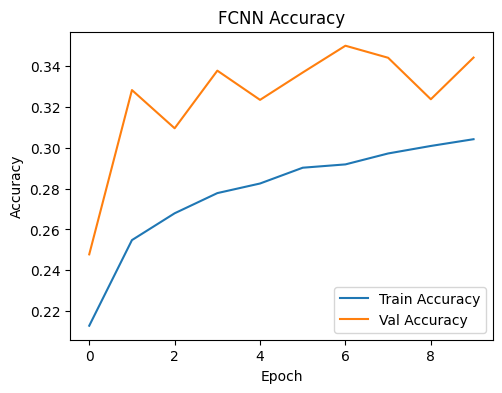

In [94]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_fcnn_cifar.history['accuracy'], label='Train Accuracy')
plt.plot(history_fcnn_cifar.history['val_accuracy'], label='Val Accuracy')
plt.title('FCNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

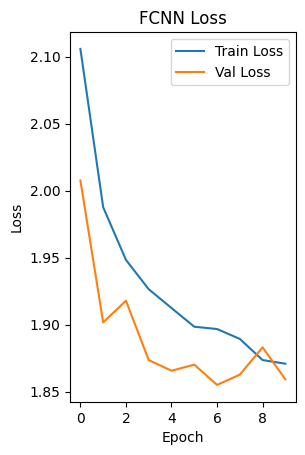

In [95]:
plt.subplot(1, 2, 2)
plt.plot(history_fcnn_cifar.history['loss'], label='Train Loss')
plt.plot(history_fcnn_cifar.history['val_loss'], label='Val Loss')
plt.title('FCNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Q3. Performing experiments on a Convolutional Neural Networks (CNNs):

In [96]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

In [97]:
x_train_cnn = x_train_norm
x_test_cnn = x_test_norm
input_shape = x_train_cnn.shape[1:]

In [98]:
def build_cnn_1(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, kernel_size=(5,5), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_cnn_2(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, kernel_size=(3,3), activation='relu'),
        Conv2D(32, kernel_size=(3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [100]:
cnn1_model = build_cnn_1(input_shape, num_classes)
history_cnn1 = cnn1_model.fit(
    x_train_cnn, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=2
)
print()
test_loss1, test_acc1 = cnn1_model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"CNN-1 CIFAR-10 Test Accuracy: {test_acc1:.4f}")

Epoch 1/30
625/625 - 2s - loss: 1.5340 - accuracy: 0.4523 - val_loss: 1.3343 - val_accuracy: 0.5287 - 2s/epoch - 2ms/step
Epoch 2/30
625/625 - 1s - loss: 1.2144 - accuracy: 0.5748 - val_loss: 1.1667 - val_accuracy: 0.5920 - 927ms/epoch - 1ms/step
Epoch 3/30
625/625 - 1s - loss: 1.0786 - accuracy: 0.6213 - val_loss: 1.1334 - val_accuracy: 0.6095 - 906ms/epoch - 1ms/step
Epoch 4/30
625/625 - 1s - loss: 0.9861 - accuracy: 0.6544 - val_loss: 1.0727 - val_accuracy: 0.6342 - 871ms/epoch - 1ms/step
Epoch 5/30
625/625 - 1s - loss: 0.9193 - accuracy: 0.6774 - val_loss: 1.1279 - val_accuracy: 0.6198 - 876ms/epoch - 1ms/step
Epoch 6/30
625/625 - 1s - loss: 0.8586 - accuracy: 0.6999 - val_loss: 1.0690 - val_accuracy: 0.6378 - 903ms/epoch - 1ms/step
Epoch 7/30
625/625 - 1s - loss: 0.7980 - accuracy: 0.7206 - val_loss: 1.1160 - val_accuracy: 0.6365 - 912ms/epoch - 1ms/step
Epoch 8/30
625/625 - 1s - loss: 0.7369 - accuracy: 0.7417 - val_loss: 1.0758 - val_accuracy: 0.6464 - 894ms/epoch - 1ms/step
Epo

In [101]:
cnn2_model = build_cnn_2(input_shape, num_classes)
history_cnn2 = cnn2_model.fit(
    x_train_cnn, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=2
)
print()
test_loss2, test_acc2 = cnn2_model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"CNN-2 CIFAR-10 Test Accuracy: {test_acc2:.4f}")

Epoch 1/30
625/625 - 2s - loss: 1.4785 - accuracy: 0.4654 - val_loss: 1.2511 - val_accuracy: 0.5575 - 2s/epoch - 4ms/step
Epoch 2/30
625/625 - 1s - loss: 1.1209 - accuracy: 0.6054 - val_loss: 1.0708 - val_accuracy: 0.6285 - 1s/epoch - 2ms/step
Epoch 3/30
625/625 - 1s - loss: 0.9747 - accuracy: 0.6558 - val_loss: 1.0489 - val_accuracy: 0.6391 - 1s/epoch - 2ms/step
Epoch 4/30
625/625 - 1s - loss: 0.8736 - accuracy: 0.6946 - val_loss: 0.9985 - val_accuracy: 0.6548 - 1s/epoch - 2ms/step
Epoch 5/30
625/625 - 1s - loss: 0.7892 - accuracy: 0.7216 - val_loss: 0.9894 - val_accuracy: 0.6640 - 1s/epoch - 2ms/step
Epoch 6/30
625/625 - 1s - loss: 0.7080 - accuracy: 0.7520 - val_loss: 0.9996 - val_accuracy: 0.6711 - 1s/epoch - 2ms/step
Epoch 7/30
625/625 - 1s - loss: 0.6350 - accuracy: 0.7767 - val_loss: 0.9919 - val_accuracy: 0.6691 - 1s/epoch - 2ms/step
Epoch 8/30
625/625 - 1s - loss: 0.5616 - accuracy: 0.8055 - val_loss: 1.0294 - val_accuracy: 0.6692 - 1s/epoch - 2ms/step

CNN-2 CIFAR-10 Test Acc

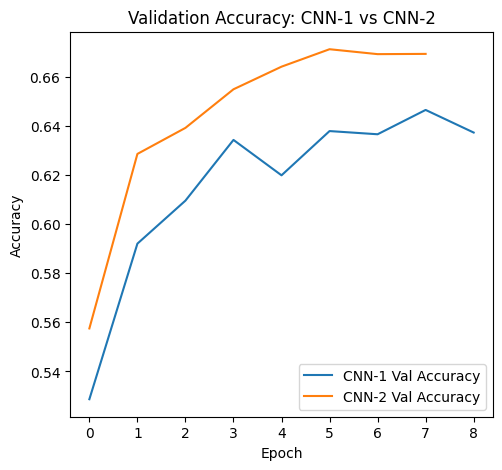

In [102]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_cnn1.history['val_accuracy'], label='CNN-1 Val Accuracy')
plt.plot(history_cnn2.history['val_accuracy'], label='CNN-2 Val Accuracy')
plt.title('Validation Accuracy: CNN-1 vs CNN-2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Q4. Compare the performances of FCNN and CNN. 

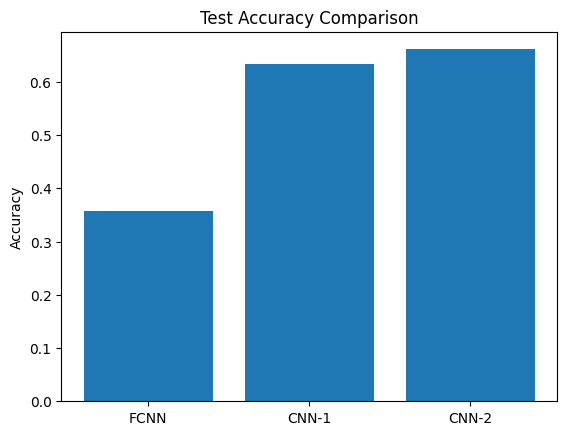

In [103]:
models = ['FCNN', 'CNN-1', 'CNN-2']
accuracies = [test_acc, test_acc1, test_acc2]

plt.bar(models, accuracies)
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


# Q5. Compare the number of parameters in the FCNN and the CNN. Which layer/s in CNN contribute most to the total number of parameters.

In [ ]:
print("FCNN Model Summary:")
fcnn_model.summary()

print("\nCNN-1 Model Summary:")
cnn1_model.summary()

print("\nCNN-2 Model Summary:")
cnn2_model.summary()
